# ImbalancedLearningRegression (0.0.1): Usage
---
## Nearmiss Undersampling

Cameron Cooke, ccook059@uottawa.ca@uottawa.ca \
Adapted from Nick Kunz's SMOGN package: https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_1_beg.ipynb

## Installation

First, we install ImbalancedLearningRegression from the Github repository. Alternatively, we could install from the official PyPI distribution. However, the developer version is utilized here for the latest release.

In [32]:
%%capture
## suppress install output

## install pypi release
# !pip install ImbalancedLearningRegression

## install developer version
#pip install git+https://github.com/paobranco/ImbalancedLearningRegression.git

## Dependencies
Next, we load the required dependencies. Here we import `ImbalancedLearningRegression` to later apply Nearmiss algorithm for under-sampling regression data. In addition, we use `pandas` for data handling, and `seaborn` to visualize our results.

In [33]:
## load dependencies
import ImbalancedLearningRegression as iblr
import sys
import pandas
import seaborn
import matplotlib.pyplot as plt
import nearmiss

## Data
After, we load our data. In this example, we use the Ames Housing Dataset training split retrieved from Kaggle, originally complied by Dean De Cock. In this case, we name our training set `housing`


In [34]:
## load data
housing = pandas.read_csv(

    ## http://jse.amstat.org/v19n3/decock.pdf
    'https://raw.githubusercontent.com/paobranco/ImbalancedLearningRegression/master/data/housing.csv'
)

## Nearmiss
Here we cover the focus of this example. We call the `Nearmiss` function from this package (`ImbalancedLearningRegression.nearmiss`) and satisfy the minimum required arguments: `data`, `y`, and 'version'.

* The `data` argument takes a Pandas DataFrame, which contains the training set split. In this example, we input the previously loaded `housing` training set with follow input: `data = housing`

* The `y` argument takes a string, which specifies a continuous reponse variable by header name. In this example, we input `'SalePrice'` in the interest of predicting the sale price of homes in Ames, Iowa with the following input: `y = 'SalePrice'`

* The `version` argument takes an int, either 1, 2, or 3, and specifies which version of Nearmiss is going to be used. For further description of this, please see the documentation.

In [ ]:
## conduct nearmiss
housing_nearmiss = nearmiss.nearmiss(
    
    data = housing,  ## pandas dataframe
    y = 'SalePrice',  ## string ('header name')
    version = 1  ## int 
)


**Note:**

In this example, the regions of interest within the response variable `y` are automatically determined by the box plot extremes. The extreme values are considered rare "minorty" values are over-sampled. The values closer the median are considered "majority" values and are under-sampled.

If there are no box plot extremes contained in the reponse variable `y`, the argument `rel_method = manual` must be specified, and an input matrix must be placed into the argument `rel_ctrl_pts_rg` indicating the regions of rarity in `y`.

More information regarding the matrix input to the `rel_ctrl_pts_rg` argument and manual over-sampling can be found within the function's doc string, as well as in Nick Kunz's package SMOGN: https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_3_adv.ipynb.

It is also important to mention that by default, `ImbalancedLearningRegression.nearmiss` will first automatically remove columns containing missing values and then remove rows, as it cannot input data containing missing values.


## Results
After conducting Nearmiss algorithm, we briefly examine the results. 

We can see that the number of observations (rows) in the original training set decreased from 1460 to 215, while the number of features (columns) also decreased from 81 to 62. 

Recall that `ImbalancedLearningRegression.nearmiss` automatically removes features containing missing values. In this case, 19 features contained missing values and were therefore omitted.

The reduction in observations were a result of under-sampling. More detailed information in this regard can be found in the original paper cited in the **References** section.



In [98]:
## dimensions - original data 
housing.shape

(1460, 81)

In [99]:
## dimensions - modified data
housing_nearmiss.shape

(215, 62)

Further examining the results, we can see that the distribution of the response variable has changed. By calling the `box_plot_stats` function from this package (`ImbalancedLearningRegression.box_plot_stats`) we quickly verify.

Notice that the modified training set's box plot five number summary has changed, where the distribution of the response variable has slightly *skewed left* when compared to the original training set.

In [100]:
## box plot stats - original data 
iblr.box_plot_stats(housing['SalePrice'])['stats']

array([ 34900., 129950., 163000., 214000., 340000.])

In [101]:
## box plot stats - modified data
iblr.box_plot_stats(housing_nearmiss['SalePrice'])['stats']

array([252000., 274150., 306000., 352000., 466500.])

Plotting the results of both the original and modified training sets, the *skewed right* distribution of the response variable in the modified training set is very evident, because of the drastic change in size between datasets.

In this example, Nearmiss under-sampled observations that were closer to the median (those considered "majority").

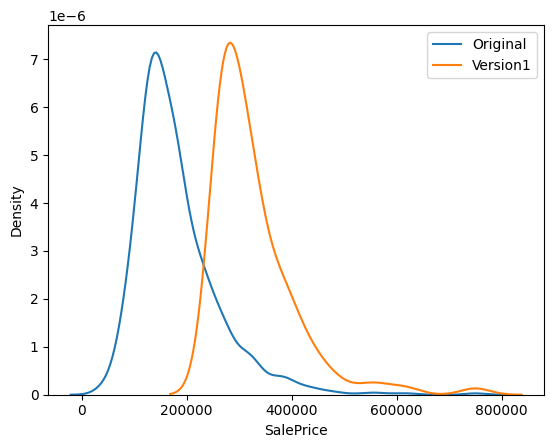

In [109]:
## plot y distribution 
seaborn.kdeplot(housing['SalePrice'], label = "Test")
seaborn.kdeplot(housing_nearmiss['SalePrice'], label = "Version1")
plt.legend(labels=["Original","Version1", "Version2", "Version3"])

## More datasets
To verify the reliability of the implementation, we test it with more datasets.

We use the College dataset retrieved from Kaggle, uploaded by Fares Sayah. In this case, we name our training set `college`. We run the same procedures as previously shown.

In [ ]:
college = pandas.read_csv(

    'https://raw.githubusercontent.com/paobranco/ImbalancedLearningRegression/master/data/College.csv'
)

## conduct nearmiss
college_nearmiss = nearmiss.nearmiss(
    
    data = college,  ## pandas dataframe
    y = 'Grad.Rate', ## string ('header name')
    version = 2, ## relevance threshold considered rare
)

In [117]:
## dimensions - original data 
college.shape

(777, 19)

In [118]:
## dimensions - modified data
college_nearmiss.shape

(197, 19)

In [119]:
## box plot stats - original data 
iblr.box_plot_stats(college['Grad.Rate'])['stats']

array([ 18.,  53.,  65.,  78., 100.])

In [120]:
## box plot stats - modified data
iblr.box_plot_stats(college_nearmiss['Grad.Rate'])['stats']

array([ 10.,  39.,  85.,  92., 118.])

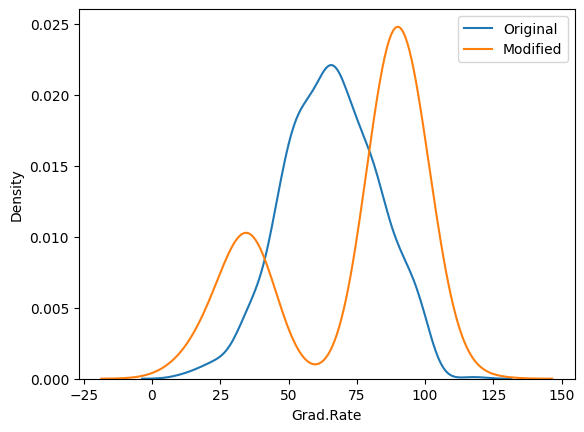

In [121]:
## plot y distribution 
seaborn.kdeplot(college['Grad.Rate'], label = "Original")
seaborn.kdeplot(college_nearmiss['Grad.Rate'], label = "Modified")
plt.legend(labels=["Original","Modified"])

## Results 2
We can see that the number of observations (rows) in the original training set decreased from 777 to 197, while the number of features (columns) didn't change. 

The decrease in observations were a result of under-sampling.

Further examining the results, we can see that the distribution of the response variable has changed. By calling the `box_plot_stats` function from this package (`ImbalancedLearningRegression.box_plot_stats`) we quickly verify.

In this example, Nearmiss under-sampled observations whose `'Grad.Rate'` was found to be closer to the median (those considered "majority").



## More datasets
We will now test the final version of this dataset.

We use the Avacado dataset retrieved from Kaggle, uploaded by Fares Sayah. In this case, we name our training set `avacado`. We run the same procedures as previously shown.

In [127]:
avocado = pandas.read_csv(

    'https://raw.githubusercontent.com/paobranco/ImbalancedLearningRegression/master/data/avocado.csv'
)

## conduct nearmiss
avocado_nearmiss = nearmiss.nearmiss(
    
    data = avocado,  ## pandas dataframe
    y = 'AveragePrice', ## string ('header name')
    version = 3, ## relevance threshold considered rare
)

In [132]:
## dimensions - original data 
avocado.shape

(18249, 14)

In [133]:
## dimensions - modified data
avocado_nearmiss.shape

(1778, 14)

In [134]:
## box plot stats - original data 
iblr.box_plot_stats(avocado['AveragePrice'])['stats']

## box plot stats - modified data
iblr.box_plot_stats(avocado_nearmiss['AveragePrice'])['stats']

array([1.94, 2.01, 2.12, 2.31, 2.76])

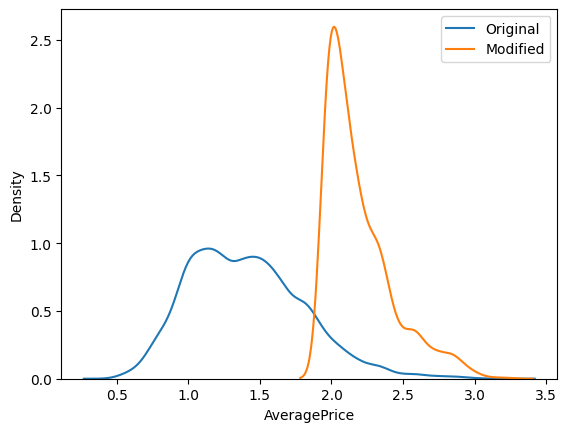

In [135]:
## plot y distribution 
seaborn.kdeplot(avocado['AveragePrice'], label = "Original")
seaborn.kdeplot(avocado_nearmiss['AveragePrice'], label = "Modified")
plt.legend(labels=["Original","Modified"])

## Results 3
We can see that the number of observations (rows) in the original training set decreased from 18249 to 1778, while the number of features (columns) didn't change. 

The decrease in observations were a result of under-sampling.

Further examining the results, we can see that the distribution of the response variable has changed. By calling the `box_plot_stats` function from this package (`ImbalancedLearningRegression.box_plot_stats`) we quickly verify.

In this example, Nearmiss under-sampled observations whose `'AveragePrice'` was found to be closer to the median (those considered "majority").


## Conclusion
In the examples, we covered the fundamentals of Nearmiss in ImbalancedLearningRegression. We utilized the Ames Housing Dataset, College dataset, and Avocado Price Datasets to conduct Nearmiss algorithm with the minimum required arguments. 

Nearmiss under-sampled "majority" values in a continuous response variable. The results were briefly examined with the box plot's five number summary and plotted for visual confirmation.

<!-- More examples, where additional features of SMOGN are explored can be found within the packages example directory. Developer updates are available in the package's Github repository at https://github.com/nickkunz/smogn. Official releases are available in the Python Package Index and can be found at https://pypi.org/project/smogn. -->



## References

Branco, P., Torgo, L., Ribeiro, R. (2017). SMOGN: A Pre-Processing Approach for Imbalanced Regression. Proceedings of Machine Learning Research, 74:36-50. http://proceedings.mlr.press/v74/branco17a/branco17a.pdf.

Branco, P., Torgo, L., & Ribeiro, R. P. (2019). Pre-processing approaches for imbalanced distributions in regression. Neurocomputing, 343, 76-99. https://www.sciencedirect.com/science/article/abs/pii/S0925231219301638.

De Cock, D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project. Journal of Statistics Education 19(3). https://doi.org/10.1080/10691898.2011.11889627.

Wilson, D. L. (1972). Asymptotic properties of nearest neighbor rules using edited data. IEEE Transactions on Systems, Man, and Cybernetics, (3), 408-421. https://ieeexplore.ieee.org/abstract/document/4309137

Kunz, N. (2019). SMOGN: Synthetic Minority Over-Sampling for Regression with Gaussian Noise (Version 0.1.0). Python Package Index.
https://pypi.org/project/smogn. 

Sayah, F. (2020). College data. Kaggle. https://www.kaggle.com/datasets/faressayah/college-data